# Análisis de Datos de Bolsa de Valores
## Histograma de Rendimiento y Análisis de Volumen vs Precio

En este notebook vamos a:
1. Obtener datos reales de acciones usando Yahoo Finance
2. Calcular el rendimiento diario de las acciones
3. Crear un histograma para visualizar la distribución del rendimiento
4. Analizar la relación entre volumen y precio de cierre

In [5]:
# Importar librerías necesarias
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. Obtener Datos de Yahoo Finance

Vamos a descargar datos históricos de Apple (AAPL) de los últimos 6 meses.

In [6]:
# Definir el ticker de la empresa (Apple en este caso)
ticker = "AAPL"

# Descargar datos de los últimos 6 meses
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=180)

# Obtener datos históricos
datos = yf.download(ticker, start=fecha_inicio, end=fecha_fin, progress=False)

# Aplanar el MultiIndex si existe (cuando se descarga un solo ticker)
if isinstance(datos.columns, pd.MultiIndex):
    datos.columns = datos.columns.droplevel(1)

# Mostrar información básica
print(f"Datos descargados de {ticker}")
print(f"Período: {fecha_inicio.date()} a {fecha_fin.date()}")
print(f"Total de registros: {len(datos)}")
print("\nPrimeras filas:")
datos.head()

C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_49132\578753974.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker, start=fecha_inicio, end=fecha_fin, progress=False)


Datos descargados de AAPL
Período: 2025-04-28 a 2025-10-25
Total de registros: 126

Primeras filas:


Price,Close,High,Low,Open,Volume
Date,,,,,
2025-04-28,209.626892,210.983572,206.953443,209.487235,38743100
2025-04-29,210.694290,211.721774,207.861213,208.180439,36827600
2025-04-30,211.981125,213.058490,206.165359,208.788942,52286500
2025-05-01,212.799133,214.036096,208.389912,208.569481,57365700
2025-05-02,204.848587,206.484582,201.666374,205.586770,101010600


## 2. Exploración de Datos

In [3]:
# Información general del dataset
print("Información del dataset:")
print(datos.info())
print("\n" + "="*50)
print("\nEstadísticas descriptivas:")
print(datos.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2025-04-28 to 2025-10-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   126 non-null    float64
 1   High    126 non-null    float64
 2   Low     126 non-null    float64
 3   Open    126 non-null    float64
 4   Volume  126 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None


Estadísticas descriptivas:
Price       Close        High         Low        Open        Volume
count  126.000000  126.000000  126.000000  126.000000  1.260000e+02
mean   221.903690  223.985337  219.694302  221.793183  5.389756e+07
std     20.714570   20.629350   20.436593   20.493652  1.996284e+07
min    195.048645  197.346030  192.778123  193.450453  3.062120e+07
25%    203.059547  206.564758  201.505122  204.188269  4.234722e+07
50%    212.903694  214.656393  210.985554  212.314032  4.839100e+07
75%    237.880005  239.637497  23

## 3. Histograma: Distribución del Rendimiento Diario

C:\Users\omaroalvaradoc\AppData\Local\Temp\ipykernel_49132\2286380222.py:56: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot([datos_rendimiento], vert=True, patch_artist=True,


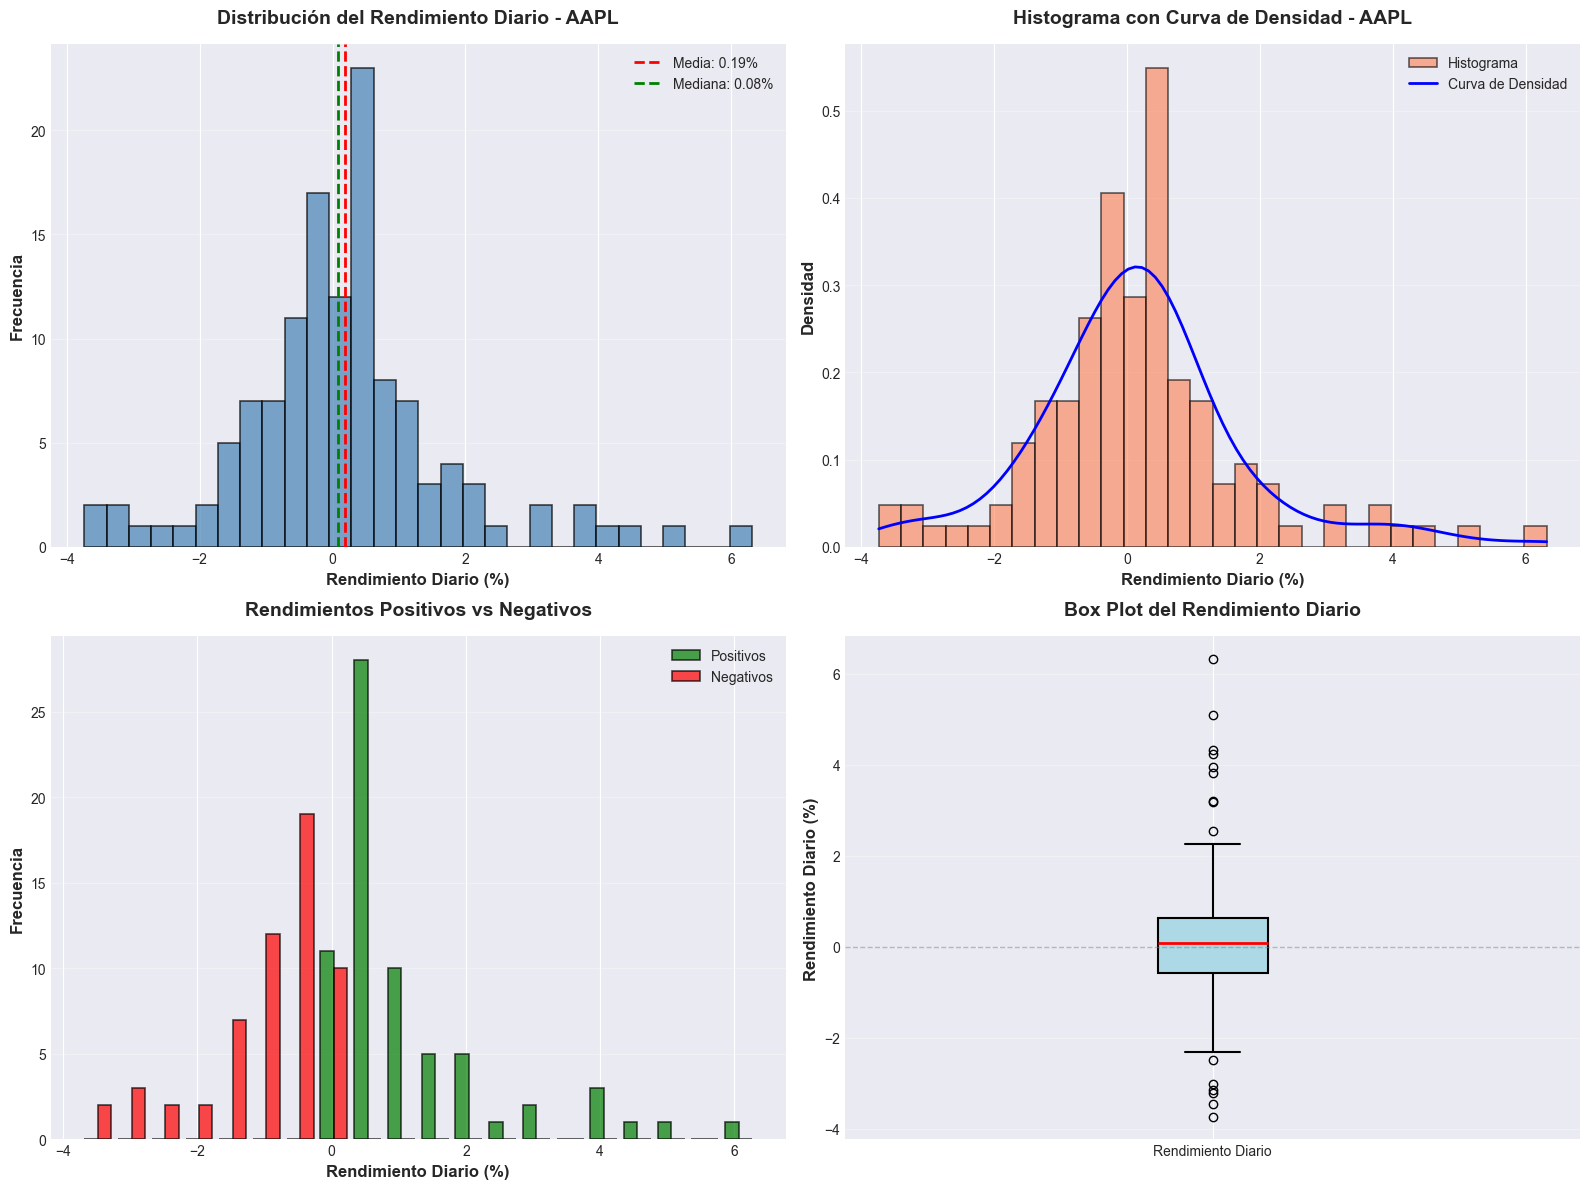


ESTADÍSTICAS DEL RENDIMIENTO DIARIO
Media: 0.1935%
Mediana: 0.0795%
Desviación Estándar: 1.5910%
Mínimo: -3.7362%
Máximo: 6.3146%
Días con rendimiento positivo: 68 (54.4%)
Días con rendimiento negativo: 57 (45.6%)
Volatilidad anualizada: 25.26%


In [7]:
# Calcular el rendimiento diario (porcentaje de cambio)
datos['Rendimiento'] = datos['Close'].pct_change() * 100

# Eliminar el primer valor NaN
datos_rendimiento = datos['Rendimiento'].dropna()

# Crear figura con múltiples histogramas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histograma del Rendimiento Diario
ax1 = axes[0, 0]
n, bins, patches = ax1.hist(datos_rendimiento, bins=30, edgecolor='black', 
                            linewidth=1.2, alpha=0.7, color='steelblue')
ax1.axvline(datos_rendimiento.mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Media: {datos_rendimiento.mean():.2f}%')
ax1.axvline(datos_rendimiento.median(), color='green', linestyle='--', 
           linewidth=2, label=f'Mediana: {datos_rendimiento.median():.2f}%')
ax1.set_xlabel('Rendimiento Diario (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax1.set_title(f'Distribución del Rendimiento Diario - {ticker}', fontsize=14, fontweight='bold', pad=15)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Histograma con Curva de Densidad
ax2 = axes[0, 1]
ax2.hist(datos_rendimiento, bins=30, density=True, edgecolor='black', 
        linewidth=1.2, alpha=0.6, color='coral', label='Histograma')

# Agregar curva de densidad (KDE)
from scipy import stats
kde = stats.gaussian_kde(datos_rendimiento)
x_range = np.linspace(datos_rendimiento.min(), datos_rendimiento.max(), 100)
ax2.plot(x_range, kde(x_range), 'b-', linewidth=2, label='Curva de Densidad')
ax2.set_xlabel('Rendimiento Diario (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Densidad', fontsize=12, fontweight='bold')
ax2.set_title(f'Histograma con Curva de Densidad - {ticker}', fontsize=14, fontweight='bold', pad=15)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. Rendimientos Positivos vs Negativos
ax3 = axes[1, 0]
rendimientos_pos = datos_rendimiento[datos_rendimiento > 0]
rendimientos_neg = datos_rendimiento[datos_rendimiento < 0]

ax3.hist([rendimientos_pos, rendimientos_neg], bins=20, 
        label=['Positivos', 'Negativos'], 
        color=['green', 'red'], alpha=0.7, edgecolor='black', linewidth=1.2)
ax3.set_xlabel('Rendimiento Diario (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
ax3.set_title('Rendimientos Positivos vs Negativos', fontsize=14, fontweight='bold', pad=15)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Box plot del Rendimiento
ax4 = axes[1, 1]
bp = ax4.boxplot([datos_rendimiento], vert=True, patch_artist=True,
                 labels=['Rendimiento Diario'],
                 boxprops=dict(facecolor='lightblue', edgecolor='black', linewidth=1.5),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='black', linewidth=1.5),
                 capprops=dict(color='black', linewidth=1.5))
ax4.set_ylabel('Rendimiento Diario (%)', fontsize=12, fontweight='bold')
ax4.set_title('Box Plot del Rendimiento Diario', fontsize=14, fontweight='bold', pad=15)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

# Estadísticas del rendimiento
print("\n" + "="*80)
print("ESTADÍSTICAS DEL RENDIMIENTO DIARIO")
print("="*80)
print(f"Media: {datos_rendimiento.mean():.4f}%")
print(f"Mediana: {datos_rendimiento.median():.4f}%")
print(f"Desviación Estándar: {datos_rendimiento.std():.4f}%")
print(f"Mínimo: {datos_rendimiento.min():.4f}%")
print(f"Máximo: {datos_rendimiento.max():.4f}%")
print(f"Días con rendimiento positivo: {len(rendimientos_pos)} ({len(rendimientos_pos)/len(datos_rendimiento)*100:.1f}%)")
print(f"Días con rendimiento negativo: {len(rendimientos_neg)} ({len(rendimientos_neg)/len(datos_rendimiento)*100:.1f}%)")
print(f"Volatilidad anualizada: {datos_rendimiento.std() * np.sqrt(252):.2f}%")

## 4. Gráfica de Volumen vs Precio de Cierre

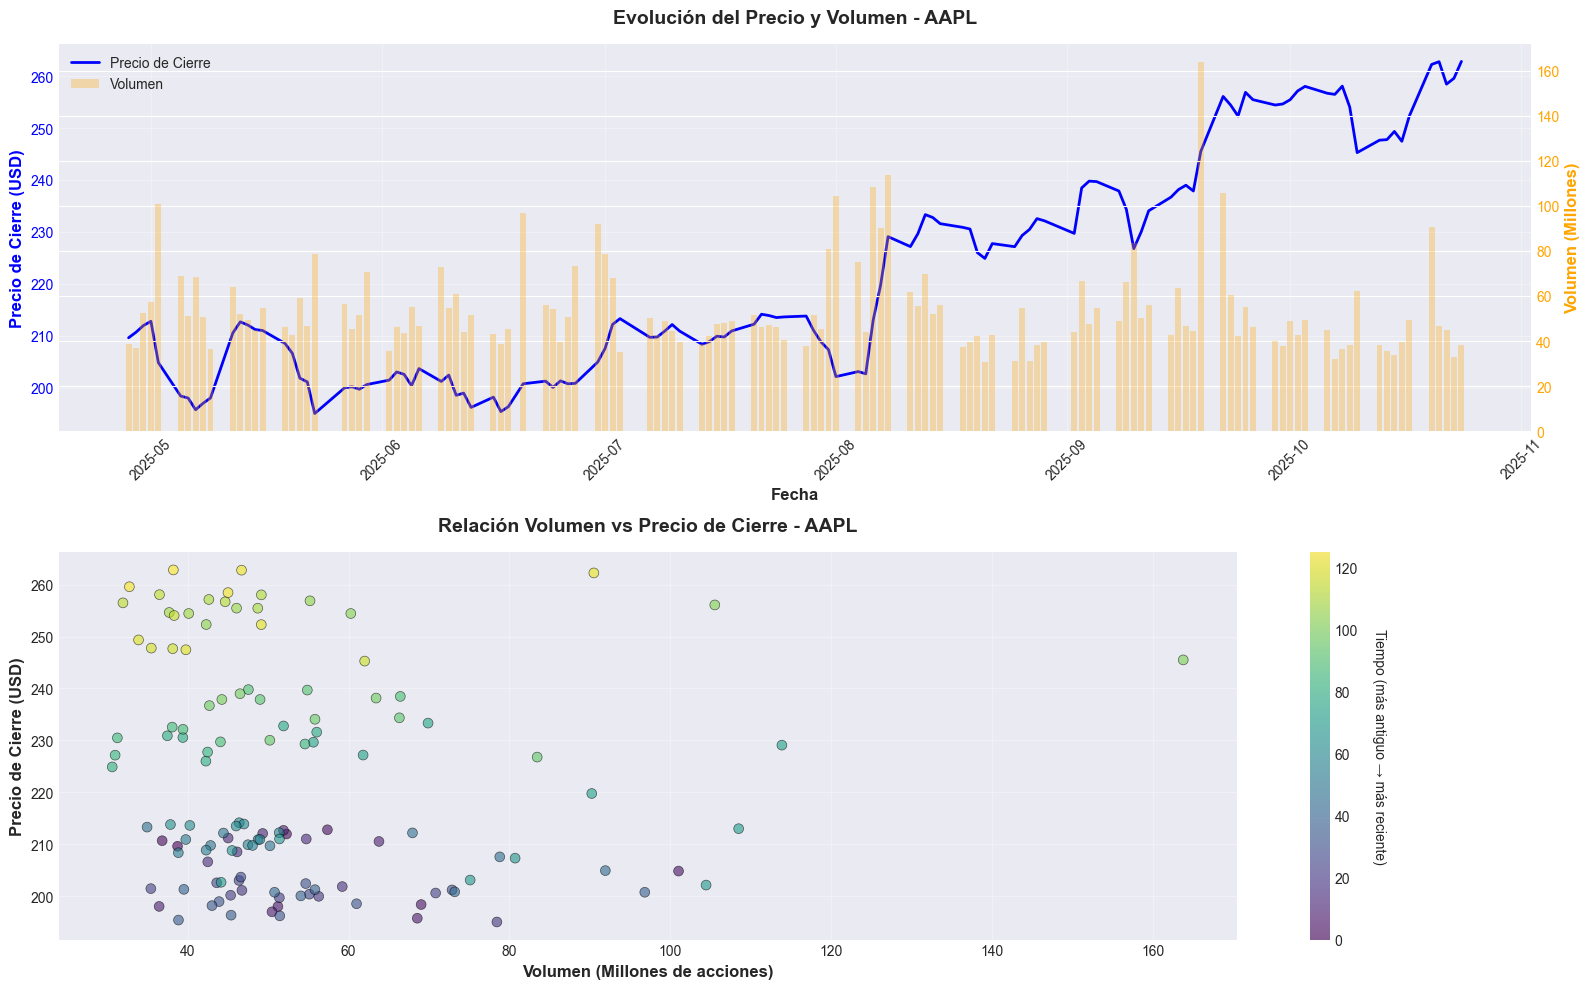


Correlación Volumen vs Precio de Cierre: -0.0949


In [8]:
# Crear figura con gráficas de volumen vs precio
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Gráfico 1: Volumen y Precio en el tiempo (ejes separados)
ax1 = axes[0]
ax1_twin = ax1.twinx()

# Graficar precio de cierre
line1 = ax1.plot(datos.index, datos['Close'], color='blue', linewidth=2, label='Precio de Cierre')
ax1.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precio de Cierre (USD)', fontsize=12, fontweight='bold', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Graficar volumen en eje secundario
bars = ax1_twin.bar(datos.index, datos['Volume']/1e6, alpha=0.3, color='orange', label='Volumen')
ax1_twin.set_ylabel('Volumen (Millones)', fontsize=12, fontweight='bold', color='orange')
ax1_twin.tick_params(axis='y', labelcolor='orange')

# Combinar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.set_title(f'Evolución del Precio y Volumen - {ticker}', fontsize=14, fontweight='bold', pad=15)

# Gráfico 2: Relación directa Volumen vs Precio
ax2 = axes[1]
colors_scatter = np.arange(len(datos))
scatter = ax2.scatter(datos['Volume']/1e6, datos['Close'], 
                     c=colors_scatter, cmap='viridis', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)

ax2.set_xlabel('Volumen (Millones de acciones)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Precio de Cierre (USD)', fontsize=12, fontweight='bold')
ax2.set_title(f'Relación Volumen vs Precio de Cierre - {ticker}', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3)

# Agregar barra de color
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Tiempo (más antiguo → más reciente)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Calcular correlación
correlacion_vol_precio = datos['Volume'].corr(datos['Close'])
print(f"\nCorrelación Volumen vs Precio de Cierre: {correlacion_vol_precio:.4f}")

## 5. Diagrama de Dispersión con Línea de Regresión

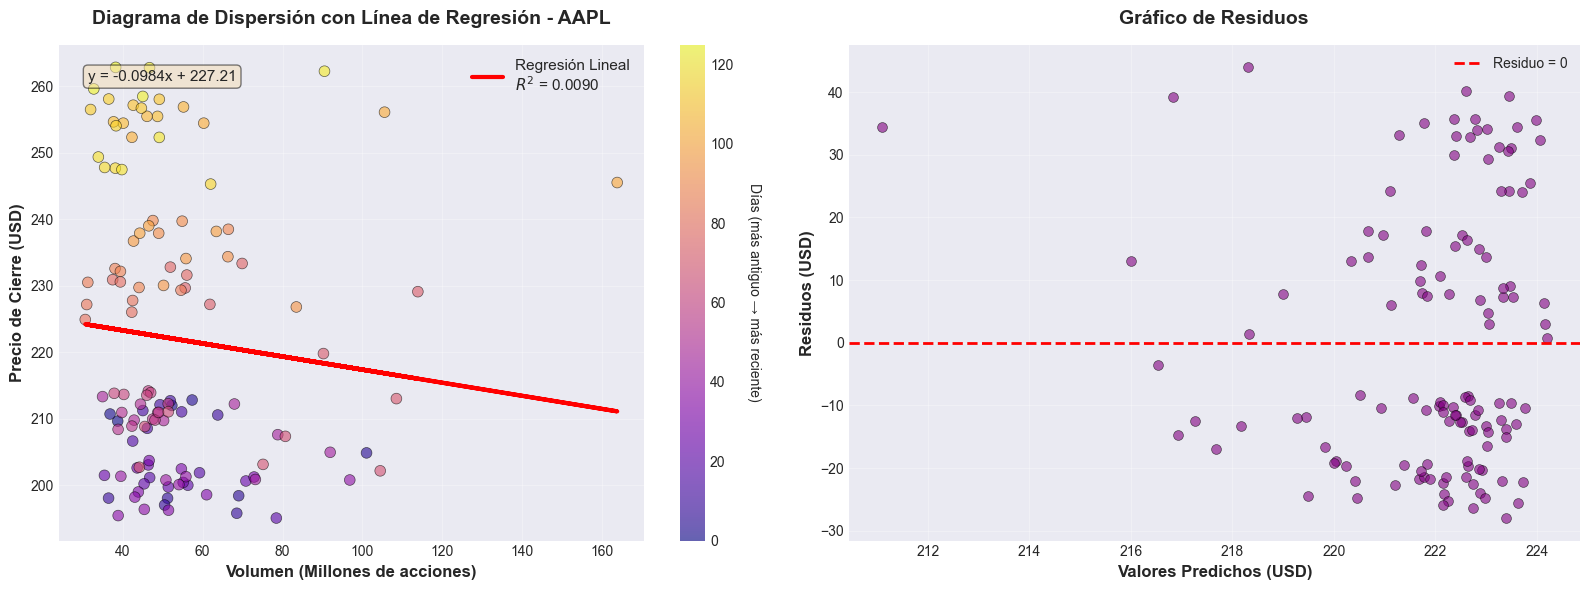


ANÁLISIS DE REGRESIÓN: VOLUMEN vs PRECIO DE CIERRE
Pendiente (β₁): -0.098441
Intercepto (β₀): 227.21
Ecuación: Precio = -0.098441 × Volumen(M) + 227.21
R² (Coeficiente de determinación): 0.0090
Correlación: -0.0949

Interpretación del R²:
→ Ajuste débil: El volumen explica poco de la variación del precio

Estadísticas de Residuos:
Media de residuos: -0.0000 (debería estar cerca de 0)
Desviación estándar de residuos: 20.5392
Residuo máximo: 43.9378
Residuo mínimo: -27.9662


In [9]:
# Crear diagrama de dispersión con línea de regresión
from sklearn.linear_model import LinearRegression

# Preparar datos para regresión
X = datos['Volume'].values.reshape(-1, 1) / 1e6  # Volumen en millones
y = datos['Close'].values

# Crear y entrenar modelo de regresión
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# Calcular R² (coeficiente de determinación)
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)

# Crear figura con múltiples vistas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Dispersión con línea de regresión
ax1 = axes[0]
scatter1 = ax1.scatter(X, y, c=np.arange(len(datos)), cmap='plasma', 
                      s=60, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.plot(X, y_pred, color='red', linewidth=3, label=f'Regresión Lineal\n$R^2$ = {r2:.4f}')
ax1.set_xlabel('Volumen (Millones de acciones)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precio de Cierre (USD)', fontsize=12, fontweight='bold')
ax1.set_title(f'Diagrama de Dispersión con Línea de Regresión - {ticker}', 
             fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3)

# Añadir ecuación de la recta
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
ecuacion = f'y = {pendiente:.4f}x + {intercepto:.2f}'
ax1.text(0.05, 0.95, ecuacion, transform=ax1.transAxes, 
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Días (más antiguo → más reciente)', rotation=270, labelpad=20)

# Gráfico 2: Residuos
ax2 = axes[1]
residuos = y - y_pred
ax2.scatter(y_pred, residuos, alpha=0.6, s=50, color='purple', edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Residuo = 0')
ax2.set_xlabel('Valores Predichos (USD)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuos (USD)', fontsize=12, fontweight='bold')
ax2.set_title('Gráfico de Residuos', fontsize=14, fontweight='bold', pad=15)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de la regresión
print("\n" + "="*80)
print("ANÁLISIS DE REGRESIÓN: VOLUMEN vs PRECIO DE CIERRE")
print("="*80)
print(f"Pendiente (β₁): {pendiente:.6f}")
print(f"Intercepto (β₀): {intercepto:.2f}")
print(f"Ecuación: Precio = {pendiente:.6f} × Volumen(M) + {intercepto:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"Correlación: {correlacion_vol_precio:.4f}")
print(f"\nInterpretación del R²:")
if r2 > 0.7:
    print("→ Ajuste fuerte: El volumen explica gran parte de la variación del precio")
elif r2 > 0.4:
    print("→ Ajuste moderado: El volumen explica parcialmente la variación del precio")
else:
    print("→ Ajuste débil: El volumen explica poco de la variación del precio")

# Análisis de residuos
print(f"\nEstadísticas de Residuos:")
print(f"Media de residuos: {residuos.mean():.4f} (debería estar cerca de 0)")
print(f"Desviación estándar de residuos: {residuos.std():.4f}")
print(f"Residuo máximo: {residuos.max():.4f}")
print(f"Residuo mínimo: {residuos.min():.4f}")

## 6. Análisis de Riesgo y Retorno

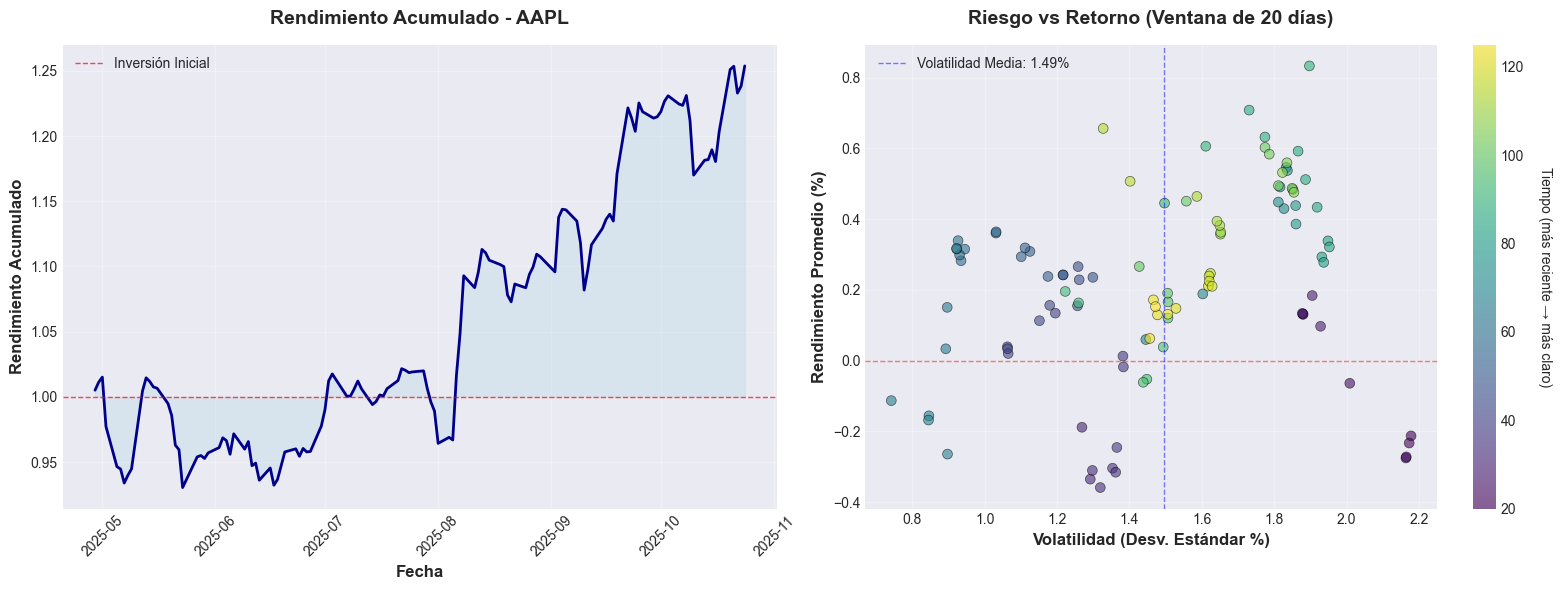


Rendimiento Total del Período: 25.38%
Mejor día: 6.31% (2025-05-12)
Peor día: -3.74% (2025-05-02)


In [10]:
# Análisis de riesgo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Rendimiento acumulado
ax1 = axes[0]
rendimiento_acumulado = (1 + datos['Rendimiento']/100).cumprod()
ax1.plot(datos.index, rendimiento_acumulado, linewidth=2, color='darkblue')
ax1.fill_between(datos.index, 1, rendimiento_acumulado, alpha=0.3, color='lightblue')
ax1.axhline(y=1, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Inversión Inicial')
ax1.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax1.set_ylabel('Rendimiento Acumulado', fontsize=12, fontweight='bold')
ax1.set_title(f'Rendimiento Acumulado - {ticker}', fontsize=14, fontweight='bold', pad=15)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Dispersión Riesgo vs Retorno (ventana móvil)
ax2 = axes[1]
ventana = 20  # 20 días
rendimiento_movil = datos['Rendimiento'].rolling(window=ventana).mean()
volatilidad_movil = datos['Rendimiento'].rolling(window=ventana).std()

scatter = ax2.scatter(volatilidad_movil, rendimiento_movil, 
                     c=range(len(volatilidad_movil)), cmap='viridis', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax2.axvline(x=volatilidad_movil.mean(), color='blue', linestyle='--', 
           linewidth=1, alpha=0.5, label=f'Volatilidad Media: {volatilidad_movil.mean():.2f}%')
ax2.set_xlabel('Volatilidad (Desv. Estándar %)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Rendimiento Promedio (%)', fontsize=12, fontweight='bold')
ax2.set_title(f'Riesgo vs Retorno (Ventana de {ventana} días)', fontsize=14, fontweight='bold', pad=15)
ax2.legend()
ax2.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Tiempo (más reciente → más claro)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

# Calcular rendimiento total del período
rendimiento_total = ((datos['Close'].iloc[-1] / datos['Close'].iloc[0]) - 1) * 100
print(f"\nRendimiento Total del Período: {rendimiento_total:.2f}%")
print(f"Mejor día: {datos_rendimiento.max():.2f}% ({datos_rendimiento.idxmax().date()})")
print(f"Peor día: {datos_rendimiento.min():.2f}% ({datos_rendimiento.idxmin().date()})")

## 7. Conclusiones

**Análisis del histograma de rendimiento:**
- La distribución del rendimiento diario muestra la frecuencia de ganancias y pérdidas
- Una distribución aproximadamente normal sugiere un comportamiento predecible del mercado
- La volatilidad (desviación estándar) indica el nivel de riesgo de la inversión

**Análisis Volumen vs Precio:**
- La línea de regresión muestra la relación lineal entre volumen y precio
- El R² indica qué tan bien el volumen explica las variaciones en el precio
- Los residuos muestran los errores de predicción del modelo

**Insights clave:**
- Días con rendimiento positivo vs negativo proporcionan perspectiva sobre la tendencia
- La volatilidad anualizada es una medida estándar del riesgo
- El rendimiento acumulado muestra el crecimiento de la inversión en el tiempo
- La correlación volumen-precio ayuda a entender la actividad del mercado